## Gaussian Naive Bayes

### Autor: Antonio Castañares Rodríguez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### Steps for Gaussian Naive Bayes

#### 1. Calculate the Mean and Variance for Each Feature by Category
In Gaussian Naïve Bayes, we assume each feature follows a normal (Gaussian) distribution. To model this distribution, we calculate the mean and variance for each feature by category using their numpy functions.

#### 2. Compute the Likelihood (Probability) of Each Feature per Category
Once we have the mean and variance, we use compute the likelihood of a new data point belonging to a class.

The Gaussian (Normal) distribution is given by:

$$
P(x_i | y) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

Where:
- $P(x_i | y)$ is the probability of feature $x_i$ given class $y$.
- $\mu$ is the mean of the feature for class $y$.
- $\sigma^2$ is the variance of the feature for class $y$.
- $e$ is the exponential function.

The final classification decision is based on maximizing:

$$
Y∗=arg⁡max⁡_{y}[log ⁡P(y)+\sum_{i=1}^{n}log⁡P(Xi∣y)]
$$

Where:

- $P(y)$ → Prior Probability represents how likely a class is before considering the features (we applied log to underflow errors).

In [2]:
class GaussianNaiveBayes:
    def fit(self,X,y,smoothing=0):
        self.classes = np.unique(y)
        self.mean = {}
        self.var = {}
        self.priors = {} # How common our class is in the dataset
        
        for c in self.classes:
            X_c = X[y == c]
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + smoothing
            self.priors[c] = np.sum(y == c) / len(y)
    
    def predict(self,X):
        likelihoods = []

        for c in self.classes:
            prior = np.log(self.priors[c])
            numerator = np.exp(-((X - self.mean[c]) ** 2) / (2 * self.var[c]))
            denominator = np.sqrt(2 * np.pi * self.var[c])
            likelihood = np.prod(numerator / denominator, axis=1)
            likelihoods.append(prior + likelihood)

        return self.classes[np.argmax(likelihoods, axis=0)]

#### Iris dataset.

Let´s try to use gaussian naive bayes in the Iris dataset. It was used in R.A. Fisher's classic 1936 paper and includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

In [3]:
df = pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
print(f"Name of columns in the dataset:{list(df.columns)}")

Name of columns in the dataset:['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


In [6]:
df.describe(include='all')

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,Iris-setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.843333,3.054000,3.758667,1.198667,NaN
std,43.445368,0.828066,0.433594,1.764420,0.763161,NaN
min,1.000000,4.300000,2.000000,1.000000,0.100000,NaN
25%,38.250000,5.100000,2.800000,1.600000,0.300000,NaN
50%,75.500000,5.800000,3.000000,4.350000,1.300000,NaN
75%,112.750000,6.400000,3.300000,5.100000,1.800000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
print(f"Number of missing values: \n{df.isnull().sum()}")

Number of missing values: 
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


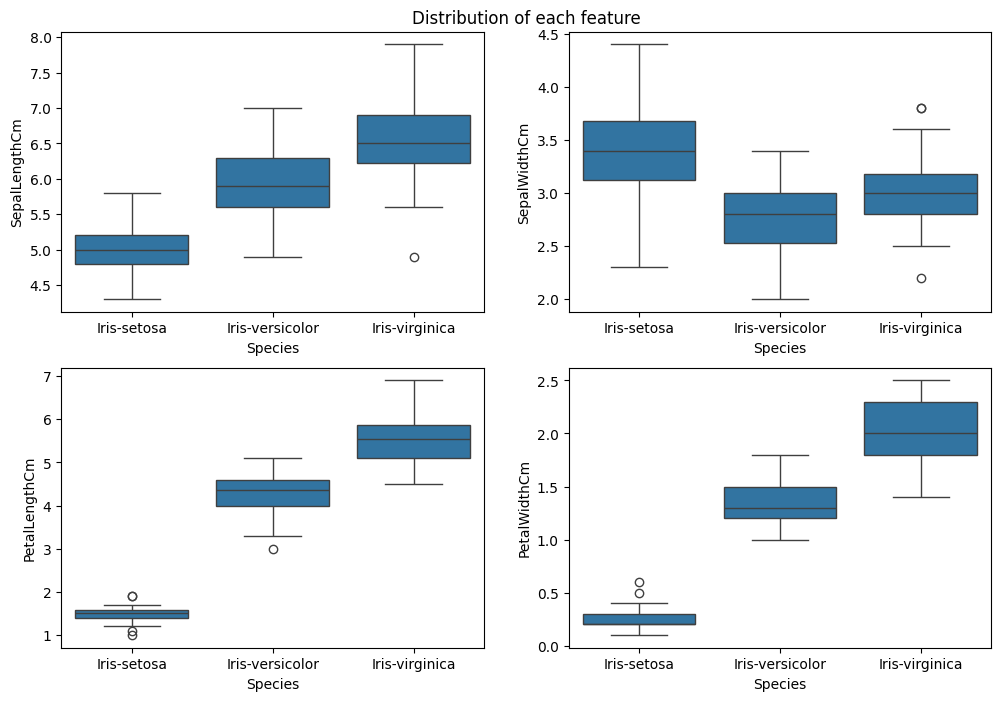

In [9]:
plt.figure(figsize=(12, 8))
plt.title("Distribution of each feature")
plt.axis('off')
aux = 1
for column in df.columns[1:-1]:
    plt.subplot(2, 2, aux)
    sns.boxplot(x='Species', y=column, data=df)
    aux += 1
plt.show()

How to read a boxplot:

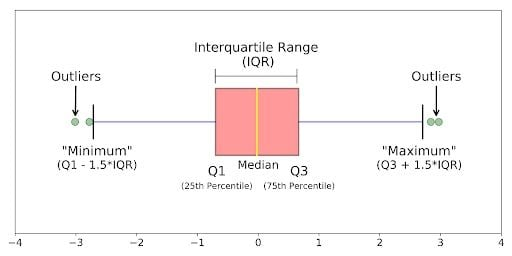

Conclusion from the boxplots:

- Petal Length and Petal Width are the most important features for distinguishing species. No species overlaps with any other.
- Sepal Length provides some separation but is less effective. Iris Setosa has lower Sepal Length values than the other two species. However, there is more overlap between Versicolor and Virginica.
- Sepal Width is not very useful for distinguishing Versicolor from Virginica. All three species overlap significantly in Sepal Width.

In [10]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

"Species" are not numerical values, let´s use LabelEncoder to transform these variable to numbers. Each specie will be a number.


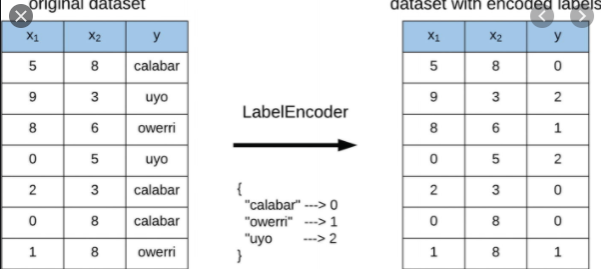

In [11]:
LabelEncoder = LabelEncoder()

In [12]:
y_encoded = LabelEncoder.fit_transform(df['Species'])
print(f"Classes: {LabelEncoder.classes_}")
print(f"Encoded classes: {np.unique(y_encoded)}")

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Encoded classes: [0 1 2]


In [13]:
print(y_encoded)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Results using my implementation of Gaussian Naive Bayes
Accuracy: 0.9333333333333333
Results using Scikit-learn's Gaussian Naive Bayes
Accuracy: 1.0


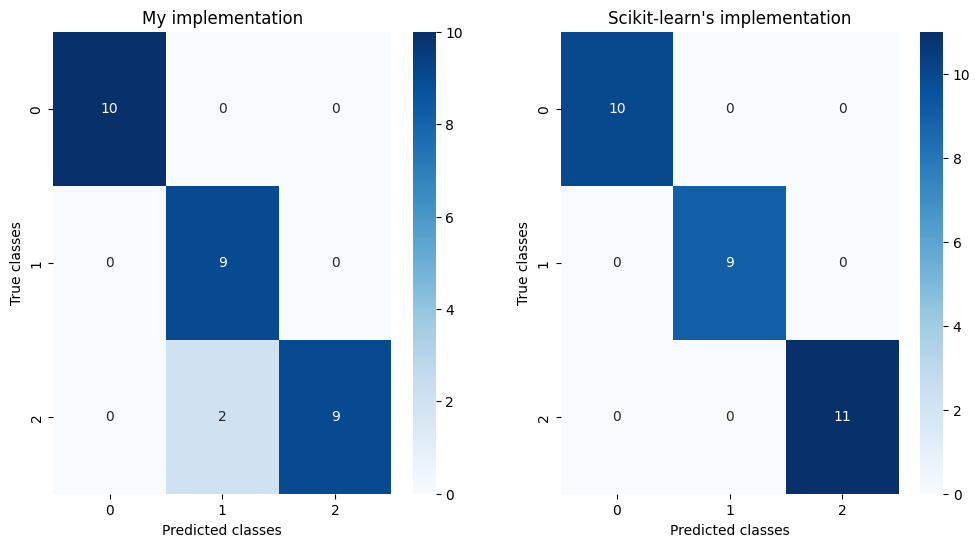

In [14]:
X = df.loc[:, ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.2, random_state = 42)

model = GaussianNaiveBayes()
model.fit(X_train.values, y_train)
my_predictions = model.predict(X_test.values)

print("Results using my implementation of Gaussian Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, my_predictions)}")

model = GaussianNB()
model.fit(X_train,y_train)
sklearn_predictions = model.predict(X_test)

print("Results using Scikit-learn's Gaussian Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, sklearn_predictions)}")

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test,my_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("My implementation")
plt.xlabel("Predicted classes")
plt.ylabel("True classes")
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test,sklearn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Scikit-learn's implementation")
plt.xlabel("Predicted classes")
plt.ylabel("True classes")
plt.show()

My implementation correctly classify most instances. However, it misclassified 2 instances of class 2 'Iris-virginica' as class 1 'Iris-versicolor'.

#### Let's do more comparisons

Now I will compare the accuracy of your Gaussian Naïve Bayes implementation (blue) versus Scikit-learn’s implementation (orange) across different test set sizes.

C:\Users\Anton\AppData\Local\Temp\ipykernel_25496\792349617.py:19: RuntimeWarning: divide by zero encountered in divide
  numerator = np.exp(-((X - self.mean[c]) ** 2) / (2 * self.var[c]))
C:\Users\Anton\AppData\Local\Temp\ipykernel_25496\792349617.py:19: RuntimeWarning: invalid value encountered in divide
  numerator = np.exp(-((X - self.mean[c]) ** 2) / (2 * self.var[c]))
C:\Users\Anton\AppData\Local\Temp\ipykernel_25496\792349617.py:21: RuntimeWarning: invalid value encountered in divide
  likelihood = np.prod(numerator / denominator, axis=1)


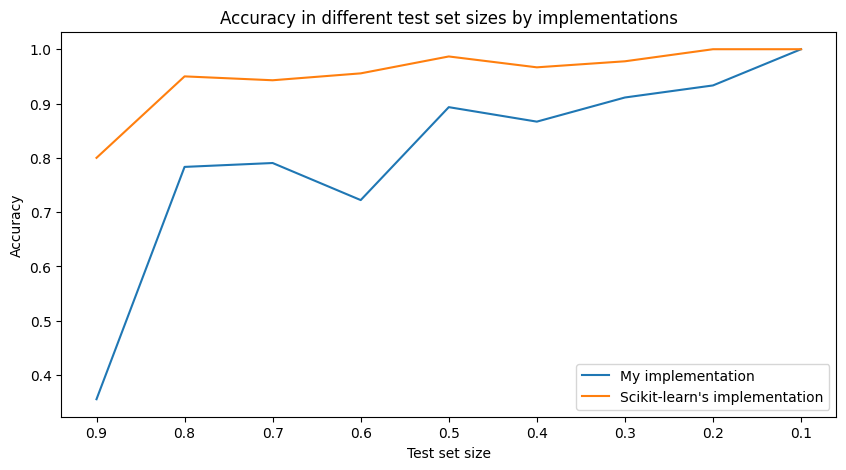

In [15]:
split_percents = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
my_accuracies = []
sklearn_accuracies = []

for i in split_percents:
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=i, random_state=42)
    
    model = GaussianNaiveBayes()
    model.fit(X_train.values, y_train)
    my_predictions = model.predict(X_test.values)
    my_accuracies.append(accuracy_score(y_test, my_predictions))
    
    model = GaussianNB()
    model.fit(X_train, y_train)
    sklearn_predictions = model.predict(X_test)
    sklearn_accuracies.append(accuracy_score(y_test, sklearn_predictions))

plt.figure(figsize=(10, 5))
plt.title("Accuracy in different test set sizes by implementations")
plt.plot(split_percents, my_accuracies, label="My implementation")
plt.plot(split_percents, sklearn_accuracies, label="Scikit-learn's implementation")
plt.xlabel("Test set size")
plt.ylabel("Accuracy")
plt.legend()
plt.gca().invert_xaxis()  # Invert the x-axis
plt.show()

When the test set is large, my accuracy is low because the model is trained on very few samples. Scikit-learn’s model is more stable and accurate, especially for larger test sets.

#### Let´s try to fix it

Previously, I did not add smoothing to avoid division by zero and underflow errors. For this reason, I will add small smoothing factor to our variance.

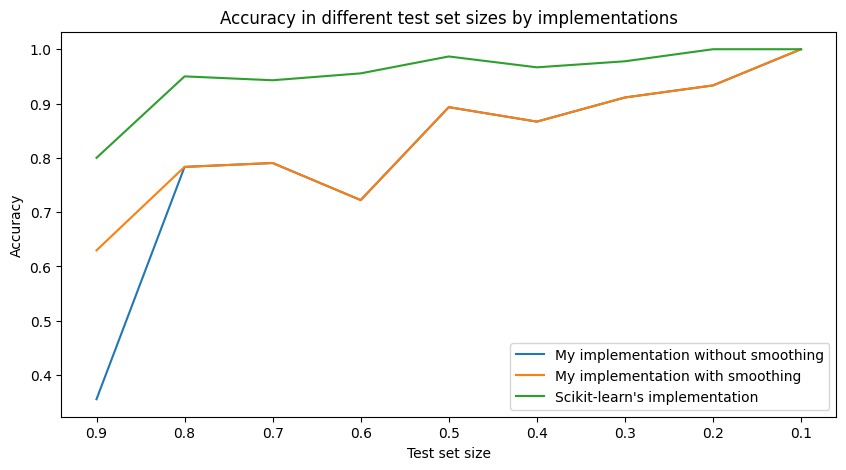

In [16]:
split_percents = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
smoothing_accuracies = []

for i in split_percents:
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=i, random_state=42)
    
    model = GaussianNaiveBayes()
    model.fit(X_train.values, y_train, smoothing=1.e-10)
    my_predictions = model.predict(X_test.values)
    smoothing_accuracies.append(accuracy_score(y_test, my_predictions))

plt.figure(figsize=(10, 5))
plt.title("Accuracy in different test set sizes by implementations")
plt.plot(split_percents, my_accuracies, label="My implementation without smoothing")
plt.plot(split_percents, smoothing_accuracies, label="My implementation with smoothing")
plt.plot(split_percents, sklearn_accuracies, label="Scikit-learn's implementation")
plt.xlabel("Test set size")
plt.ylabel("Accuracy")
plt.legend()
plt.gca().invert_xaxis()  # Invert the x-axis
plt.show()

Smoothing improves the performance of my implementation in small dataset, however in large dataset the performance is similar. We need rewrite the all code to get better performance.

#### New Gaussian Naive Bayes implementation.

Previously, we said the final classification decision is based on maximizing:

$$
Y∗=arg⁡max⁡_{y}[log ⁡P(y)+\sum_{i=1}^{n}log⁡P(Xi∣y)]
$$

However, I did not implement log in $⁡P(Xi∣y)$. Since multiplying small probabilities causes underflow errors, we take the natural logarithm:

$$
\log P(X | C) = \sum_{i=1}^{n} \log P(X_i | C)
$$

Using the logarithm of the Gaussian formula:

$$
\log P(X_i | C) = -\frac{1}{2} [\log(2\pi\sigma^2) - \frac{(X_i - \mu)^2}{2\sigma^2}]
$$


In [ ]:
class GaussianNaiveBayes:
    def fit(self,X,y,smoothing=0):
        # Use arrays instead dictionaries
        self.classes = np.unique(y)
        self.mean = np.array([np.mean(X[y == c], axis=0) for c in self.classes])
        self.var = np.array([np.var(X[y == c], axis=0) + smoothing for c in self.classes])
        self.priors = np.array([np.sum(y == c) / len(y) for c in self.classes])
    
    def predict(self,X):
        likelihoods = []

        for c in self.classes:
            prior = np.log(self.priors[c])
            fraction = -0.5 * np.sum(((X - self.mean[c]) ** 2) / self.var[c], axis=1) # −1/2 * ∑σ2(Xi−μ)2
            log = -0.5 * np.sum(np.log(2 * np.pi * self.var[c])) # -1/2 * ∑log(2πσ2)
            likelihood = log + fraction
            likelihoods.append(prior + likelihood)

        return self.classes[np.argmax(likelihoods, axis=0)]

####

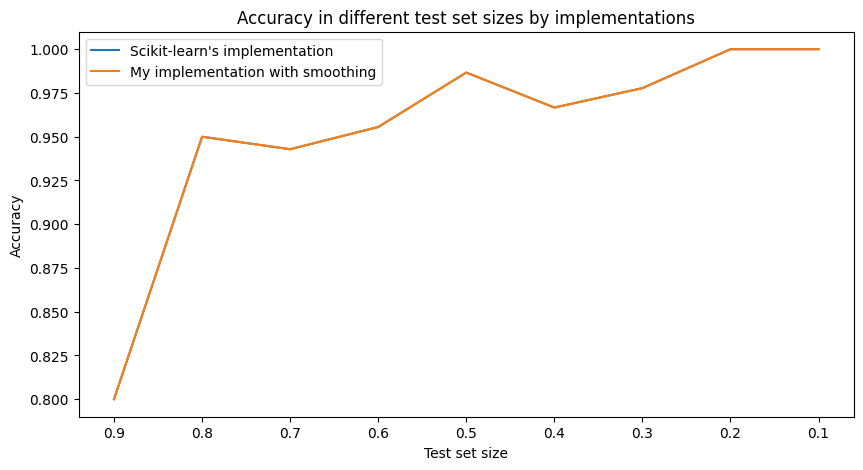

In [18]:
split_percents = [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
smoothing_accuracies = []

for i in split_percents:
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=i, random_state=42)
    
    model = GaussianNaiveBayes()
    model.fit(X_train.values, y_train, smoothing=1.e-10)
    my_predictions = model.predict(X_test.values)
    smoothing_accuracies.append(accuracy_score(y_test, my_predictions))

plt.figure(figsize=(10, 5))
plt.title("Accuracy in different test set sizes by implementations")
plt.plot(split_percents, sklearn_accuracies, label="Scikit-learn's implementation")
plt.plot(split_percents, smoothing_accuracies, label="My implementation with smoothing")
plt.xlabel("Test set size")
plt.ylabel("Accuracy")
plt.legend()
plt.gca().invert_xaxis()  # Invert the x-axis
plt.show()

My implementation is now equivalent to Scikit-learn’s GaussianNB.

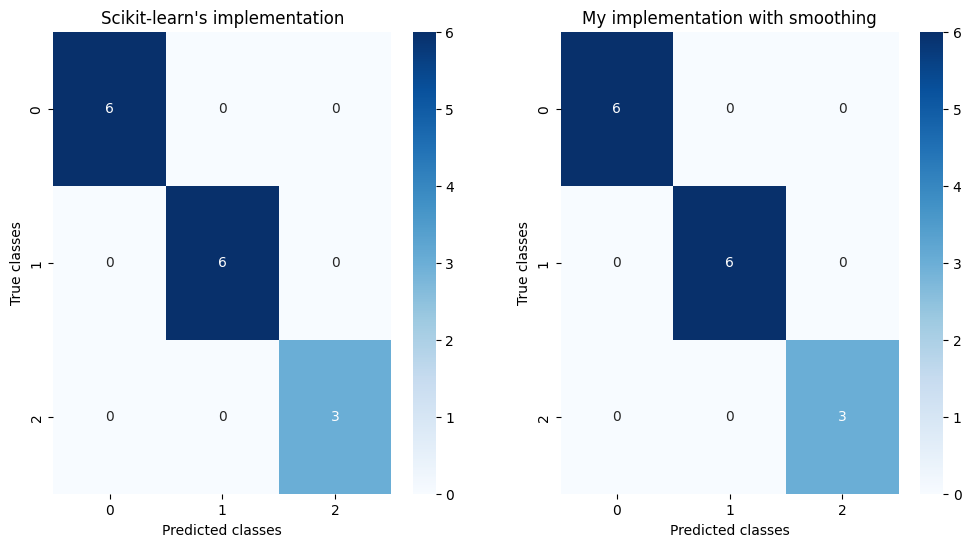

Results using my implementation of Gaussian Naive Bayes with smoothing
Accuracy: 1.0
Results using Scikit-learn's Gaussian Naive Bayes
Accuracy: 1.0


In [19]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test,sklearn_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("Scikit-learn's implementation")
plt.xlabel("Predicted classes")
plt.ylabel("True classes")
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test,my_predictions), annot=True, fmt='d', cmap='Blues')
plt.title("My implementation with smoothing")
plt.xlabel("Predicted classes")
plt.ylabel("True classes")
plt.show()

print("Results using my implementation of Gaussian Naive Bayes with smoothing")
print(f"Accuracy: {accuracy_score(y_test, my_predictions)}")
print("Results using Scikit-learn's Gaussian Naive Bayes")
print(f"Accuracy: {accuracy_score(y_test, sklearn_predictions)}")

Both matrices match perfectly and no misclassifications, meaning the model works perfectly on this test set.